In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection and processing


In [22]:
car_dataset = pd.read_csv('car_dataset.csv')

In [24]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [26]:
car_dataset.shape

(4340, 8)

In [28]:
# Getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [30]:
car_dataset.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [32]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64
seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64
transmission
Manual       3892
Automatic     448
Name: count, dtype: int64


In [38]:
car_dataset['selling_price']=car_dataset['selling_price']/10000

In [40]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,6.0,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,13.5,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,60.0,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,25.0,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,45.0,141000,Diesel,Individual,Manual,Second Owner


# Encoding the catgorical data

In [42]:
# set the text values into numerical values 
car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3, 'Electric':4}}, inplace=True)

car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)

car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

C:\Users\A C E R\AppData\Local\Temp\ipykernel_2676\2499979787.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3, 'Electric':4}}, inplace=True)
C:\Users\A C E R\AppData\Local\Temp\ipykernel_2676\2499979787.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
C:\Users\A C E R\AppData\Local\Temp\ipykernel_2676\2499979787.py:6: FutureWarning: Downcasting behavior in `rep

In [44]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,6.0,70000,1,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,13.5,50000,1,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,60.0,100000,0,0,0,First Owner
3,Datsun RediGO T Option,2017,25.0,46000,1,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,45.0,141000,0,0,0,Second Owner


In [46]:
print(car_dataset.owner.value_counts())

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64


In [48]:
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}},inplace=True)

C:\Users\A C E R\AppData\Local\Temp\ipykernel_2676\258989482.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4}},inplace=True)


In [50]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,6.0,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,13.5,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,60.0,100000,0,0,0,0
3,Datsun RediGO T Option,2017,25.0,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,45.0,141000,0,0,0,1


# Splitting the data into Training data and Test Data

In [52]:
x = car_dataset.drop(['name','selling_price'],axis=1)
y = car_dataset['selling_price']

In [54]:
print(x)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [56]:
print(y)

0        6.0000
1       13.5000
2       60.0000
3       25.0000
4       45.0000
         ...   
4335    40.9999
4336    40.9999
4337    11.0000
4338    86.5000
4339    22.5000
Name: selling_price, Length: 4340, dtype: float64


# Splitting the data into train and test 

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

# Model Training

In [60]:
# Loading the linear regression model
model = LinearRegression()

In [62]:
model.fit(x_train,y_train)

LinearRegression()

# Model evaluation

In [64]:
training_data_prediction = model.predict(x_train)

In [66]:
# R squared error
error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared error for training data:",error_score)

R squared error for training data: 0.44105965102630607


# visualize the actual price and the predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

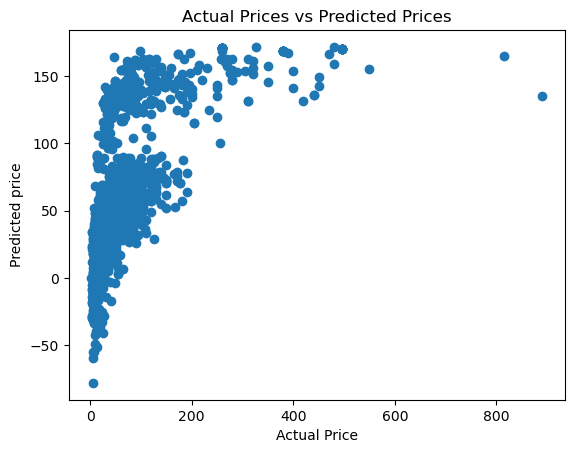

In [68]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

In [71]:
testing_data_prediction = model.predict(x_test)
error_score = metrics.r2_score(y_test,testing_data_prediction)
print("R squared error for testing data:",error_score)

R squared error for testing data: 0.4934304332808267
